# Import libraries

In [1]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

# Import modules

In [2]:
# Add path for module
# FIXME: shouldn't need this with a package install (`__init__` should suffice?!)
MODEL_DIR = Path().resolve().parent / "KuehnEtAl2023"
sys.path.append(str(MODEL_DIR))

import run_displacement_profile

# View the docstrings

In [3]:
help(run_displacement_profile)

Help on module run_displacement_profile:

NAME
    run_displacement_profile

DESCRIPTION
    This file runs the KEA23 displacement model to create a slip profile.
    - The mean model (i.e., mean coefficients) is used.
    - The results are returned in a pandas DataFrame.
    - Results for left-peak, right-peak, and folded (symmetrical) profiles are always returned.
    - Command-line use is supported; try `python run_displacement_profile.py --help`
    - Module use is supported; try `from run_displacement_profile import run_profile`
    
    # NOTE: This script just calls `run_displacement_model.py`
    
    Reference: https://doi.org/10.1177/ToBeAssigned

FUNCTIONS
    main()
    
    run_profile(*, magnitude: Union[float, int, List[Union[float, int]], numpy.ndarray], style: Union[str, List[str], numpy.ndarray], percentile: Union[float, int, List[Union[float, int]], numpy.ndarray], location_step: float = 0.05) -> pandas.core.frame.DataFrame
        Run KEA23 displacement model to cre

# Run profile

## Single scenarios

A single scenario is defined as a magnitude/percentile/style. Here is an example (note all parameters must be passed as keyword arguments).

In [4]:
mag, sof, perc = 6.8, "strike-slip", 0.5

results = run_displacement_profile.run_profile(
    magnitude=mag, style=sof, percentile=perc
)

results.head()

,magnitude,location,style,percentile,model_number,lambda,mu_site,sigma_site,mu_complement,sigma_complement,Y_site,Y_complement,Y_folded,displ_site,displ_complement,displ_folded
0,6.8,0.00,strike-slip,0.5,-1,0.161181,-1.734550,0.971766,-1.734550,1.063136,-1.734550,-1.734550,-1.734550,0.130751,0.130751,0.130751
1,6.8,0.05,strike-slip,0.5,-1,0.161181,-1.173978,0.935564,-1.404251,1.016017,-1.173978,-1.404251,-1.289115,0.272149,0.203492,0.235731
2,6.8,0.10,strike-slip,0.5,-1,0.161181,-0.820454,0.904361,-1.118572,0.974279,-0.820454,-1.118572,-0.969513,0.414776,0.291288,0.348466
3,6.8,0.15,strike-slip,0.5,-1,0.161181,-0.547223,0.877941,-0.865115,0.937748,-0.547223,-0.865115,-0.706169,0.563901,0.393884,0.472512
4,6.8,0.20,strike-slip,0.5,-1,0.161181,-0.332420,0.856085,-0.641525,0.906228,-0.332420,-0.641525,-0.486973,0.710592,0.508052,0.602211


The default location spacing is 0.05, but it can be changed with `location_step=0.01`, for example:

In [5]:
results = run_displacement_profile.run_profile(
    magnitude=mag, style=sof, percentile=perc, location_step=0.01
)

results.head()

,magnitude,location,style,percentile,model_number,lambda,mu_site,sigma_site,mu_complement,sigma_complement,Y_site,Y_complement,Y_folded,displ_site,displ_complement,displ_folded
0,6.8,0.00,strike-slip,0.5,-1,0.161181,-1.734550,0.971766,-1.734550,1.063136,-1.734550,-1.734550,-1.734550,0.130751,0.130751,0.130751
1,6.8,0.01,strike-slip,0.5,-1,0.161181,-1.568438,0.964116,-1.661790,1.053275,-1.568438,-1.661790,-1.615114,0.163971,0.144529,0.153993
2,6.8,0.02,strike-slip,0.5,-1,0.161181,-1.452016,0.956672,-1.594129,1.043633,-1.452016,-1.594129,-1.523073,0.191249,0.158414,0.174184
3,6.8,0.03,strike-slip,0.5,-1,0.161181,-1.350663,0.949434,-1.528962,1.034210,-1.350663,-1.528962,-1.439813,0.218003,0.172829,0.194317
4,6.8,0.04,strike-slip,0.5,-1,0.161181,-1.258803,0.942398,-1.465753,1.025006,-1.258803,-1.465753,-1.362278,0.244896,0.187845,0.214786


And the profiles can be plotted:

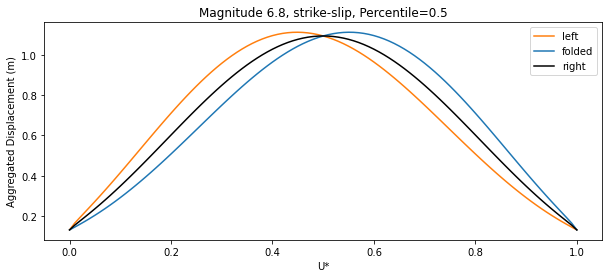

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
x, d_left, d_right, d_folded = (
    results["location"],
    results["displ_site"],
    results["displ_complement"],
    results["displ_folded"],
)
ax.plot(x, d_left, c="tab:orange", label="left")
ax.plot(x, d_right, c="tab:blue", label="folded")
ax.plot(x, d_folded, c="k", label="right")
title = f"Magnitude {mag}, {sof}, Percentile={perc}"
ax.set(xlabel="U*", ylabel="Aggregated Displacement (m)", title=title)
ax.legend(loc="best");

## Multiple scenarios

Because the profiles are based on the mean model coefficients (this is hard-coded in `run_displacement_profile.py`), multiple mangitudes, styles, or percentiles can be run.

In [7]:
mag, perc, sof = (
    [6.8],
    [0.5, 0.84, -1],
    ["reverse", "strike-slip"],
)

results = run_displacement_profile.run_profile(
    magnitude=mag, style=sof, percentile=perc
)

display(results.head())
display(results.tail())

,magnitude,location,style,percentile,model_number,lambda,mu_site,sigma_site,mu_complement,sigma_complement,Y_site,Y_complement,Y_folded,displ_site,displ_complement,displ_folded
4,6.8,0.00,reverse,-1.0,-1,0.117785,-0.789419,0.817701,-0.789419,1.022360,-0.506444,-0.375069,-0.440756,0.593227,0.681400,0.635967
10,6.8,0.05,reverse,-1.0,-1,0.117785,0.152052,0.813638,-0.643467,0.996500,0.408520,-0.251391,0.078564,1.490327,0.774771,1.081342
16,6.8,0.10,reverse,-1.0,-1,0.117785,0.216780,0.811021,-0.539074,0.972461,0.470250,-0.166215,0.152017,1.580417,0.845469,1.162616
22,6.8,0.15,reverse,-1.0,-1,0.117785,0.235780,0.809840,-0.447545,0.950217,0.488145,-0.091964,0.198091,1.607416,0.911681,1.216302
28,6.8,0.20,reverse,-1.0,-1,0.117785,0.233121,0.810093,-0.364303,0.929738,0.485690,-0.024299,0.230695,1.603687,0.975960,1.255604


,magnitude,location,style,percentile,model_number,lambda,mu_site,sigma_site,mu_complement,sigma_complement,Y_site,Y_complement,Y_folded,displ_site,displ_complement,displ_folded
99,6.8,0.80,strike-slip,0.84,-1,0.161181,-0.641525,0.906228,-0.332420,0.856085,0.259680,0.518921,0.389301,1.289679,1.646017,1.458743
105,6.8,0.85,strike-slip,0.84,-1,0.161181,-0.865115,0.937748,-0.547223,0.877941,0.067436,0.325853,0.196645,1.069373,1.373804,1.213602
111,6.8,0.90,strike-slip,0.84,-1,0.161181,-1.118572,0.974279,-0.820454,0.904361,-0.149693,0.078895,-0.035399,0.859393,1.081552,0.965122
117,6.8,0.95,strike-slip,0.84,-1,0.161181,-1.404251,1.016017,-1.173978,0.935564,-0.393865,-0.243599,-0.318732,0.665696,0.779962,0.720932
123,6.8,1.00,strike-slip,0.84,-1,0.161181,-1.734550,1.063136,-1.734550,0.971766,-0.677306,-0.768170,-0.722738,0.488113,0.440407,0.463746


And we can plot the different scenarios:

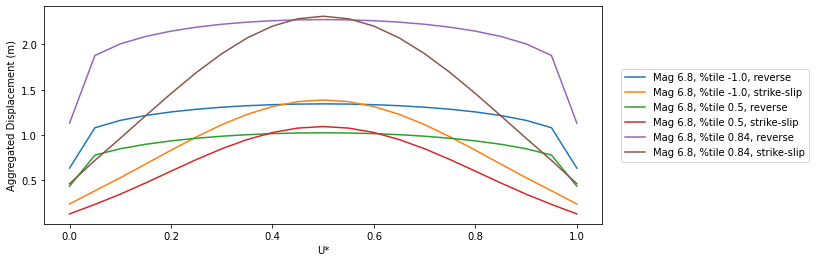

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

for scenario, group in results.groupby(["magnitude", "percentile", "style"]):
    m, p, s = scenario[0], scenario[1], scenario[2]
    x, y = group["location"], group["displ_folded"]
    label = f"Mag {m}, %tile {p}, {s}"
    ax.plot(x,y,label=label)

ax.set(xlabel="U*", ylabel="Aggregated Displacement (m)")
ax.legend(loc='center left', bbox_to_anchor=(1.025, 0.5));

# Scratch

In [9]:
mag, perc, sof = (
    [6.8],
    [-1],
    "reverse",
)

results = run_displacement_profile.run_profile(
    magnitude=mag, style=sof, percentile=perc
)

for x in ["displ_site", "displ_complement", "displ_folded"]:
    print(np.trapz(results[x], results["location"]))


mag, perc, sof = (
    [7.2],
    [-1],
    "reverse",
)

results = run_displacement_profile.run_profile(
    magnitude=mag, style=sof, percentile=perc
)

for x in ["displ_site", "displ_complement", "displ_folded"]:
    print(np.trapz(results[x], results["location"]))

1.2537633811315114
1.2537633811315114
1.2301318011654612
1.8449804101095508
1.844980410109551
1.8128000474623929


In [10]:
mag, perc, sof = (
    [6.8, 7.2],
    [-1],
    "reverse",
)

results = run_displacement_profile.run_profile(
    magnitude=mag, style=sof, percentile=perc
)

grouped = results.groupby('magnitude')
areas = {name: np.trapz(group['displ_site'], group['location']) for name, group in grouped}

areas_df = pd.DataFrame(list(areas.items()), columns=['x', 'area'])

areas_df

,x,area
0,6.8,1.253763
1,7.2,1.844980
